In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!gdown 1zkLmt5cYNbNvMeF47MDDykoFaFPpD3js
!gdown 13mdK-jX_eDNa5v-HB34WOS3WNHSru_ir
!gdown 1p_3VGWoJVmeUJ08ndljUauk48KwgHV_l

Downloading...
From (original): https://drive.google.com/uc?id=1zkLmt5cYNbNvMeF47MDDykoFaFPpD3js
From (redirected): https://drive.google.com/uc?id=1zkLmt5cYNbNvMeF47MDDykoFaFPpD3js&confirm=t&uuid=d24733c4-59b5-4196-989d-9fd35ec9e704
To: /content/data.zip
100% 973M/973M [00:12<00:00, 76.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=13mdK-jX_eDNa5v-HB34WOS3WNHSru_ir
To: /content/merged_colab_og.json
100% 2.58M/2.58M [00:00<00:00, 185MB/s]
Downloading...
From: https://drive.google.com/uc?id=1p_3VGWoJVmeUJ08ndljUauk48KwgHV_l
To: /content/val.json
100% 143k/143k [00:00<00:00, 114MB/s]


In [3]:
!unzip -q data

In [4]:
!pip -q install transformers openai-clip pytorch_warmup

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 6.6 MB/s eta 0:00:00


In [1]:
from PIL import Image
import json
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm import tqdm
import clip
from transformers import CLIPProcessor, CLIPModel
from PIL import ImageFile
import random
from google.colab import files
import pytorch_warmup as warmup
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
json_path = '/content/merged_colab_og.json'
image_path = '/content/data/merged'
val_image_path = '/content/data/VAL'
val_json_path = '/content/val.json'

In [3]:
with open(json_path, 'r') as f:
    input_data = []
    for line in f:
        obj = json.loads(line)
        input_data.append(obj)


#C174,C713,C1027,C1600,C1694

input_data[92] = json.loads('{"pths":".\/data\/merged\/NC13441.jpg","caps":"Stars and Stripes Scarf","urls":"https:\/\/cdn.shopify.com\/s\/files\/1\/0243\/9693\/products\/56900_product_shoot_720x720.jpg?v=1496109800","counts":-1}')
input_data[112] = json.loads('{"pths":".\/data\/merged\/NC12869.jpg","caps":"Lobster Rhumba Tee","urls":"http:\/\/s3.amazonaws.com\/spoonflower\/public\/design_thumbnails\/0161\/6735\/rSPooncontestMasterRumbaLobster_shop_thumb.png","counts":-1}')
input_data[172] = json.loads('{"pths":".\/data\/merged\/NC12870.jpg","caps":"Stars Align for Keeneland Spring","urls":"http:\/\/cdn.bloodhorse.com\/images\/content\/TheKeenelandFilestn.jpg","counts":-1}')
input_data[575] = json.loads('{"pths":".\/data\/merged\/NC12871.jpg","caps":"5 things to know on CTVNews.ca","urls":"https:\/\/www.ctvnews.ca\/polopoly_fs\/1.2032983.1457436677!\/httpImage\/image.jpg_gen\/derivatives\/landscape_135\/image.jpg","counts":-1}')
input_data[827] = json.loads('{"pths":".\/data\/merged\/NC12872.jpg","caps":"Creative lines red color isolated - stock vector","urls":"https:\/\/thumb7.shutterstock.com\/image-photo\/stock-vector-creative-lines-red-color-isolated-450w-250407385.jpg","counts":-1}')
input_data[1326] = json.loads('{"pths":".\/data\/merged\/NC12873.jpg","caps":"Washington State Ophthalmology Partner Wanted - Ophthalmologist Wanted in WA Eyejobsguy youtube","urls":"http:\/\/i.ytimg.com\/vi\/ITjXYgvPRrU\/0.jpg","counts":-1}')
input_data[1437] = json.loads('{"pths":".\/data\/merged\/NC12874.jpg","caps":"Holiday Martini Stock Image","urls":"https:\/\/thumbs.dreamstime.com\/m\/holiday-martini-51301.jpg","counts":-1}')
input_data[1668] = json.loads('{"pths":".\/data\/merged\/NC12875.jpg","caps":"High Quality Magnetic Wallet Leather flip Case For LG G Flex D958 Free Shipping UPS DHL CPAM HKPAM","urls":"http:\/\/i00.i.aliimg.com\/wsphoto\/v0\/1781555820\/High_Quality_Magnetic_Wallet_Leather_flip_Case_For_LG_G_Flex_D958_Free_Shipping_UPS_DHL_CPAM_HKPAM.jpg_200x200.jpg","counts":-1}')
input_data[1730] = json.loads('{"pths":".\/data\/merged\/NC12876.jpg","caps":"Shilpa Shetty and Jaaved Jaaferi","urls":"http:\/\/im.rediff.com\/movies\/2014\/mar\/13tweet2.jpg","counts":-1}')
input_data[1767] = json.loads('{"pths":".\/data\/merged\/NC12877.jpg","caps":"Dodge Viper... the sexiest car","urls":"https:\/\/i.pinimg.com\/236x\/9b\/a7\/b8\/9ba7b819639316b105d812e3a56456a6.jpg","counts":-1}')
input_data[1802] = json.loads('{"pths":".\/data\/merged\/NC12879.jpg","caps":"This balanced garden has a natural and asymmetric pond. Ponds are common in Japanese gardens. These ponds often have koi fish in them. These fish can bring even more wonderful color and life to your space.","urls":"https:\/\/i.pinimg.com\/736x\/4c\/d3\/48\/4cd348287f1826f6ce2a7d0e02f578fc.jpg","counts":-1}')
input_data[1997] = json.loads('{"pths":".\/data\/merged\/NC12880.jpg","caps":"Jevi Prints Printed Gadwal Cotton Sari","urls":"http:\/\/img.fkcdn.com\/image\/sari\/b\/q\/v\/1-1-licheesilk-6-jevi-prints-400x400-imaegghfc7qgpq6r.jpeg","counts":-1}')
input_data[2237] = json.loads('{"pths":".\/data\/merged\/NC12881.jpg","caps":"leather cover for iPhone","urls":"https:\/\/soffioitaly.com\/wp-content\/uploads\/2016\/11\/soffio_cover-iP6_04-mod-1.jpg","counts":-1}')
input_data[2242] = json.loads('{"pths":".\/data\/merged\/NC12882.jpg","caps":"Henry Kapono Poster","urls":"http:\/\/images.wolfgangsvault.com\/henry-kapono\/poster\/memorabilia\/sm\/ZZZ008835-PO.jpg","counts":-1}')
input_data[2376] = json.loads('{"pths":".\/data\/merged\/NC12883.jpg","caps":"Renpure Coconut Cr\u00e8me CoWash Cleansing Conditioner","urls":"https:\/\/hips.hearstapps.com\/bpc.h-cdn.co\/assets\/17\/12\/renpure-coconut-creme-cowash-cleansing-conditioner.jpg?crop=1.0xw:1xh;center,top&amp;resize=480:*","counts":-1}')
input_data[2440] = json.loads('{"pths":".\/data\/merged\/NC12884.jpg","caps":"One-of-the-rescued-tortoises-all-set-to-come-back-to-India","urls":"https:\/\/media.cntraveller.in\/wp-content\/uploads\/2018\/11\/One-of-the-rescued-tortoises-all-set-to-come-back-to-India-866x487.jpg","counts":-1}')
input_data[2693] = json.loads('{"pths":".\/data\/merged\/NC12885.jpg","caps":"Anarchijos vaikai \/ Sons of Anarchy (2010) 3 Sezonas","urls":"https:\/\/image.tmdb.org\/t\/p\/w342\/B0WkSmfxuyK4jbPkfmTsKX5I4b.jpg","counts":-1}')
input_data[2747] = json.loads('{"pths":".\/data\/merged\/NC12886.jpg","caps":"The Oncoming Storm by Unearth","urls":"https:\/\/direct.rhapsody.com\/imageserver\/images\/Alb.212667054\/170x170.jpg","counts":-1}')
input_data[2780] = json.loads('{"pths":".\/data\/merged\/NC12887.jpg","caps":"keystone resort","urls":"http:\/\/4.bp.blogspot.com\/_4X_iD2aoO3o\/RdExAvxyLpI\/AAAAAAAAAcE\/89YSAGEpKos\/s1600\/030112_+keystone+view+with+connor.jpg","counts":-1}')
input_data[2795] = json.loads('{"pths":".\/data\/merged\/NC12888.jpg","caps":"60 in modern bathroom double vanities cabinet marble top vessel","urls":"http:\/\/t0.gstatic.com\/images?q=tbn:ANd9GcSN_y7BC47bOPk3RhH01i0stZIt-ufJDxQzpa-6BPsNC9lLGBm3Lw","counts":-1}')
input_data[2860] = json.loads('{"pths":".\/data\/merged\/NC12889.jpg","caps":"Iowa Basketball","urls":"http:\/\/krui.fm\/wordpress\/wp-content\/uploads\/2015\/01\/Iowa-Basketball.jpeg","counts":-1}')
input_data[2905] = json.loads('{"pths":".\/data\/merged\/NC12904.jpg","caps":"Keep calm and listen to SALSA MUSIC Stickers","urls":"http:\/\/rlv.zcache.co.uk\/keep_calm_and_listen_to_salsa_music_stickers-re4adf4531da347a5bbf66272bd69a8a6_v9wz7_8byvr_324.jpg","counts":-1}')
input_data[3130] = json.loads('{"pths":".\/data\/merged\/NC12905.jpg","caps":"Hand drawn exotic fruits pattern","urls":"https:\/\/img.freepik.com\/free-vector\/hand-drawn-exotic-fruits-pattern_23-2148182571.jpg?size=338&ext=jpg","counts":-1}')
input_data[3141] = json.loads('{"pths":".\/data\/merged\/NC12906.jpg","caps":"Durable Waterproof Hanging Pumpkin Devils PVC Halloween Kids Room Wall Stickers","urls":"https:\/\/ss.beddinginn.com\/images\/product\/12\/12955\/12955282_4.jpg","counts":-1}')
input_data[3488] = json.loads('{"pths":".\/data\/merged\/NC12908.jpg","caps":"The Ordinary Vitamina C","urls":"https:\/\/i2.wp.com\/theintelligentbeauty.com\/wp-content\/uploads\/2018\/04\/Vitamina-C.png?resize=320%2C202&ssl=1","counts":-1}')
input_data[3527] = json.loads('{"pths":".\/data\/merged\/NC12909.jpg","caps":"First Aiders Are (Space for 3) - Adapt-a-Sign","urls":"https:\/\/www.chelmsfordsafetysigns.co.uk\/image\/cache\/data\/56083-165x226.jpg","counts":-1}')
input_data[3620] = json.loads('{"pths":".\/data\/merged\/NC12910.jpg","caps":"Sensual young woman smiles sweetly in the flowered garden day dreaming Stock Photo","urls":"https:\/\/thumbs.dreamstime.com\/m\/sensual-young-woman-smiles-sweetly-flowered-garden-day-dreaming-41251940.jpg","counts":-1}')
input_data[3635] = json.loads('{"pths":".\/data\/merged\/NC12911.jpg","caps":"Silent Grey,  2011, ink and mixed media on linen, 200 x 100 cm","urls":"https:\/\/images.squarespace-cdn.com\/content\/51475331e4b0ad02dfd40638\/1363968047302-PIN76NU0K47LJN6URL86\/%C3%A6%C2%B2%C2%89%C3%A9%C2%BB%C2%98%C3%A7%C2%9A%C2%84%C3%A6%C2%B7%C2%B1%C3%A7%C2%81%C2%B0%C3%A8%C2%89%C2%B2+200%C3%83%C2%97100cm%C3%83%C2%972.JPG?content-type=image%2Fjpeg","counts":-1}')
input_data[3652] = json.loads('{"pths":".\/data\/merged\/NC12912.jpg","caps":"Renault Arkana 2020 Intense","urls":"https:\/\/cdn.riastatic.com\/photosnewr\/auto\/new_auto_storage\/renault_arkana__975265-341x224x70.jpg","counts":-1}')
input_data[3660] = json.loads('{"pths":".\/data\/merged\/NC12914.jpg","caps":"#WorldPressFreedomDay: Premium Times Publisher, Dapo Olorunyomi Speaks On Press Freedom in Nigeria","urls":"https:\/\/i.ytimg.com\/vi\/8Xb2-mG2C-k\/0.jpg","counts":-1}')
input_data[3802] = json.loads('{"pths":".\/data\/merged\/NC12915.jpg","caps":"Mios blues","urls":"https:\/\/s1.adlibris.com\/images\/14610524\/mios-blues.jpg","counts":-1}')
input_data[3948] = json.loads('{"pths":".\/data\/merged\/NC12916.jpg","caps":"Retro Garden of Veggies Tablecloth","urls":"http:\/\/ecx.images-amazon.com\/images\/I\/51rjQCMWgrL.jpg","counts":-1}')
input_data[3972] = json.loads('{"pths":".\/data\/merged\/NC12917.jpg","caps":"UK Election","urls":"https:\/\/blog.iqoption.com\/wp-content\/uploads\/2017\/06\/333-2.jpg","counts":-1}')
input_data[4011] = json.loads('{"pths":".\/data\/merged\/NC12945.jpg","caps":"Binary options mistakes","urls":"https:\/\/image.slidesharecdn.com\/insideoptionbinaryoptionstradingtips-150721085940-lva1-app6891\/95\/inside-option-binary-options-trading-tips-2-638.jpg?cb=1437469256","counts":-1}')
input_data[4048] = json.loads('{"pths":".\/data\/merged\/NC12946.jpg","caps":"Hermes Beard Oil","urls":"https:\/\/i.etsystatic.com\/15579978\/d\/il\/52c6fa\/2096247879\/il_340x270.2096247879_h0hw.jpg?version=0","counts":-1}')
input_data[4163] = json.loads('{"pths":".\/data\/merged\/NC12947.jpg","caps":"Almost Heroes (Widescreen)","urls":"https:\/\/i5.walmartimages.com\/asr\/a429ae33-08e8-418d-b9a6-fce7ac9d842b_1.8fedc9ca81fb23b73bdedfcaad6a2e32.jpeg?odnWidth=144&amp;odnHeight=144&amp;odnBg=ffffff","counts":-1}')
input_data[4218] = json.loads('{"pths":".\/data\/merged\/NC12948.jpg","caps":"funny monsters vector image","urls":"https:\/\/cdn4.vectorstock.com\/i\/thumb-large\/60\/73\/funny-monsters-vector-466073.jpg","counts":-1}')
input_data[4360] = json.loads('{"pths":".\/data\/merged\/NC12949.jpg","caps":"Windows 8 Live Tiles Show Up on Vanity Fair and Glamour Magazines","urls":"http:\/\/i1-news.softpedia-static.com\/images\/news2\/Windows-8-Live-Tiles-Show-Up-on-Vanity-Fair-and-Glamour-Magazines-1.png","counts":-1}')
input_data[4453] = json.loads('{"pths":".\/data\/merged\/NC12950.jpg","caps":"(Custom) Polynesian Leather Tote Bag Hibiscus Personal Signature A02","urls":"https:\/\/cdn.shopify.com\/s\/files\/1\/2074\/1905\/products\/4hgrhrh_large.jpg?v=1585886892","counts":-1}')
input_data[4506] = json.loads('{"pths":".\/data\/merged\/NC12951.jpg","caps":"Faes in Flight 15&quot; MacBook Sleeve Sleeves For MacBooks","urls":"http:\/\/rlv.zcache.ca\/faes_in_flight_15_macbook_sleeve-r69b89a5dc51d49129188762c167f74fa_2ikdv_8byvr_152.jpg","counts":-1}')
input_data[4547] = json.loads('{"pths":".\/data\/merged\/NC12954.jpg","caps":"Summer Luau Party Ideas! Tropical rum punch is a delicious summer cocktail recipe for a luau party or to sip by the pool! A mix of juice and coconut rum for a pretty layered drink.","urls":"https:\/\/i.pinimg.com\/236x\/44\/40\/2e\/44402efe80d630c515b4475bc5ede743.jpg","counts":-1}')
input_data[4663] = json.loads('{"pths":".\/data\/merged\/NC12955.jpg","caps":"d678199cdc Off White Sun Stripe Long Sleeve Swimsuit by Mini Rodini","urls":"https:\/\/cdn.shopify.com\/s\/files\/1\/0161\/9414\/2308\/products\/product-image-995949308_1000x1000.jpg?v=1561292409","counts":-1}')
input_data[4715] = json.loads('{"pths":".\/data\/merged\/NC12956.jpg","caps":"Pizza Express Byres Rd Glasgow Restaurant Happycow","urls":"https:\/\/images.happycow.net\/venues\/1024\/98\/97\/hcmp98976_375991.jpeg","counts":-1}')
input_data[4866] = json.loads('{"pths":".\/data\/merged\/NC12957.jpg","caps":"The high-tech raceboats of Acapulco","urls":"http:\/\/withbrio.com\/wp-content\/uploads\/2013\/05\/P1040813.jpg","counts":-1}')
input_data[5043] = json.loads('{"pths":".\/data\/merged\/NC12958.jpg","caps":"4-piece cotton bedding set from China (mainland)","urls":"https:\/\/p.globalsources.com\/IMAGES\/PDT\/S1085664503\/4-piece-cotton-bedding-set.jpg","counts":-1}')
input_data[5045] = json.loads('{"pths":".\/data\/merged\/NC12959.jpg","caps":"Open suitcase packed for travelling, close up","urls":"https:\/\/image.shutterstock.com\/image-photo\/open-suitcase-packed-travelling-close-260nw-542685802.jpg","counts":-1}')
input_data[5046] = json.loads('{"pths":".\/data\/merged\/NC12960.jpg","caps":"Signal Blue Solid Piquet Polo","urls":"http:\/\/cdn.yoox.biz\/49\/49141068ta_11_ap.jpg","counts":-1}')
input_data[5047] = json.loads('{"pths":".\/data\/merged\/NC12961.jpg","caps":"orange, Bride, Getting, Ready, Sepia, Fino photography","urls":"http:\/\/cdn1.projectwedding.com\/1375035673_605842235c425dad534f2790b9268b50","counts":-1}')
input_data[5048] = json.loads('{"pths":".\/data\/merged\/NC12962.jpg","caps":"Lighthouse Tower Greeting Cards - Lighthouse Greeting Card by Joana Kruse","urls":"http:\/\/images.fineartamerica.com\/images-greeting-cards-real\/greeting-card-2-lighthouse-joana-kruse.jpg","counts":-1}')
input_data[5050] = json.loads('{"pths":".\/data\/merged\/NC12963.jpg","caps":"The House Girl by Tara Conklin: Book Cover","urls":"http:\/\/img2.imagesbn.com\/images\/214670000\/214675416.JPG","counts":-1}')
input_data[5051] = json.loads('{"pths":".\/data\/merged\/NC12964.jpg","caps":"Renoir-Dance-at-Le-Moulin-de-la-Galette","urls":"http:\/\/www.istitutoitalianoarteedanza.it\/wp-content\/uploads\/2015\/04\/Renoir-Dance-at-Le-Moulin-de-la-Galette-600x446.jpg","counts":-1}')
input_data[5165] = json.loads('{"pths":".\/data\/merged\/NC12966.jpg","caps":"Isolated American Bald Eagle 2016-6 Baseball T-Shirt","urls":"https:\/\/render.fineartamerica.com\/images\/rendered\/medium\/t-shirt\/27\/47\/images\/artworkimages\/medium\/1\/isolated-american-bald-eagle-2016-6-thomas-young-transparent.png?targetx=0&targety=0&imagewidth=430&imageheight=425&modelwidth=430&modelheight=575","counts":-1}')
input_data[5052] = json.loads('{"pths":".\/data\/merged\/NC12967.jpg","caps":"apartment house for rent sign","urls":"http:\/\/res.cloudinary.com\/culturemap-com\/image\/upload\/ar_4:3,c_fill,g_faces:center,w_600\/v1550702152\/photos\/290186_original.jpg","counts":-1}')
input_data[5533] = json.loads('{"pths":".\/data\/merged\/NC12969.jpg","caps":"Turquoise Blue Bridesmaid Jewelry Beach Wedding Jewelry","urls":"https:\/\/twobewedjewelry.com\/wp-content\/uploads\/2017\/05\/IMG_8540_801x801.jpg","counts":-1}')
input_data[5576] = json.loads('{"pths":".\/data\/merged\/NC12970.jpg","caps":"Freshwater MotorPlex: Suzuki Bike Deals on NOW!","urls":"https:\/\/d3qktydh3ke4hi.cloudfront.net\/2021\/04\/22\/1619096118393_3090505_sm.jpg","counts":-1}')
input_data[5720] = json.loads('{"pths":".\/data\/merged\/NC12971.jpg","caps":"Bathabbey at night amcm.jpg","urls":"https:\/\/upload.wikimedia.org\/wikipedia\/commons\/thumb\/b\/bf\/Bathabbey_at_night_amcm.jpg\/120px-Bathabbey_at_night_amcm.jpg","counts":-1}')
input_data[5322] = json.loads('{"pths":".\/data\/merged\/NC12972.jpg","caps":"Peaceful Winter Loch Scotland.","urls":"http:\/\/thumbs.imagekind.com\/3020531_200\/Peaceful-Winter-Loch-Scotland_art.jpg?v=1492289180","counts":-1}')
input_data[5402] = json.loads('{"pths":".\/data\/merged\/NC12973.jpg","caps":"Moro Witch Doctor - 11 x 14 Movie Poster - Style A","urls":"http:\/\/images.moviepostershop.com\/moro-witch-doctor-movie-poster-1964-1010236609.jpg","counts":-1}')
input_data[5572] = json.loads('{"pths":".\/data\/merged\/NC12974.jpg","caps":"3d model Desk - Green by Nobodinoz","urls":"https:\/\/dimensiva.com\/wp-content\/uploads\/edd\/2017\/02\/desk-green-by-nobodinoz-820x820.jpg","counts":-1}')
input_data[5948] = json.loads('{"pths":".\/data\/merged\/NC12975.jpg","caps":"Physics Toolbox Sensor Suite- screenshot thumbnail","urls":"https:\/\/lh3.googleusercontent.com\/9e3XrrnChy3aQ9Giiq36BGjjyzAvkZJZhm22cEYDmohUe89zrfaoAzKWT0x70QpzWA=h310","counts":-1}')
input_data[6075] = json.loads('{"pths":".\/data\/merged\/NC12976.jpg","caps":"ESET Internet Security","urls":"https:\/\/www.antivirusine.lt\/\/images\/products\/c8024add192d988086c3276ff625a237.png","counts":-1}')
input_data[6196] = json.loads('{"pths":".\/data\/merged\/NC12978.jpg","caps":"Old dusty expired medicines Stock photo \u00a9 vavlt","urls":"https:\/\/img3.stockfresh.com\/files\/v\/vavlt\/m\/73\/3081691_stock-photo-old-dusty-expired-medicines.jpg","counts":-1}')
input_data[6310] = json.loads('{"pths":".\/data\/merged\/NC12979.jpg","caps":"Post-it note with smiley face sticked on jewelry box \u2014 Stock Photo","urls":"http:\/\/st.depositphotos.com\/1026266\/3385\/i\/110\/depositphotos_33851357-Post-it-note-with-smiley-face-sticked-on-jewelry-box.jpg","counts":-1}')
input_data[6425] = json.loads('{"pths":".\/data\/merged\/NC12980.jpg","caps":"No Mosque At Ground Zero Necktie","urls":"http:\/\/rlv.zcache.com\/no_mosque_at_ground_zero_necktie-r7ab920fa95744fbfb4fe3371423c8817_v9whb_8byvr_324.jpg","counts":-1}')
input_data[6426] = json.loads('{"pths":".\/data\/merged\/NC12981.jpg","caps":"Encouragement: How Words Change Lives  -     By: Gordon Cheng","urls":"https:\/\/g.christianbook.com\/dg\/product\/cbd\/f400\/068340.jpg","counts":-1}')
input_data[6452] = json.loads('{"pths":".\/data\/merged\/NC12982.jpg","caps":"pic of orange-tree  - Autumn design - Forest in fall. Autumn valley with mushrooms Falling leaves and bird house in he background. Space for your autumnal text.","urls":"https:\/\/static6.bigstockphoto.com\/thumbs\/1\/0\/5\/small2\/50107706.jpg","counts":-1}')
input_data[6493] = json.loads('{"pths":".\/data\/merged\/NC12983.jpg","caps":"Sioo Wood Protection AB","urls":"https:\/\/static.byggtjanst.se\/byggkatalogen\/images\/company\/scaledimages\/8937\/276x92\/sioo-woodprotection-ab-logo-2012.png","counts":-1}')
input_data[6496] = json.loads('{"pths":".\/data\/merged\/NC12984.jpg","caps":"FAHRENHEIT AFTER-SHAVE LOTION","urls":"https:\/\/cdn.shopify.com\/s\/files\/1\/0378\/8262\/6187\/products\/Y0056102_F005614000_E01_GHC_300x300.jpg?v=1589050948","counts":-1}')
input_data[6683] = json.loads('{"pths":".\/data\/merged\/NC12985.jpg","caps":"auto truck electric in reno nv 89506 citysearch","urls":"http:\/\/a.mktgcdn.com\/p\/jE3eXHckwiXrg0wNLCJP_ECc6UB_n5ttVPhxo6lrXOg\/480x480.jpg","counts":-1}')
input_data[6815] = json.loads('{"pths":".\/data\/merged\/NC12986.jpg","caps":"Canvasback","urls":"https:\/\/cdn.download.ams.birds.cornell.edu\/api\/v1\/asset\/157218321\/640","counts":-1}')
input_data[6993] = json.loads('{"pths":".\/data\/merged\/NC12987.jpg","caps":"https:\/\/www.ligue-bretagne-surf.bzh\/wp-content\/uploads\/2019\/03\/Logo-ESB-Surf-Club-e1553374195720.png","urls":"https:\/\/www.ligue-bretagne-surf.bzh\/wp-content\/uploads\/2019\/03\/Logo-ESB-Surf-Club-e1553374195720.png","counts":-1}')
input_data[7055] = json.loads('{"pths":".\/data\/merged\/NC12989.jpg","caps":"50 Sweet Girls Party Ideas I Heart Nap Time Easy recipes DIY","urls":"https:\/\/i.pinimg.com\/originals\/00\/b1\/a5\/00b1a551df019159d22e0e01d2703479.jpg","counts":-1}')
input_data[7060] = json.loads('{"pths":".\/data\/merged\/NC12990.jpg","caps":"2021 Nissan Rogue SV (Stk: 21093) in Pembroke - Image 1 of 30","urls":"https:\/\/images.edealer.ca\/2\/90859847.jpeg","counts":-1}')
input_data[7196] = json.loads('{"pths":".\/data\/merged\/NC12991.jpg","caps":"Trading in the Zone : Master the Market with Confidence, Discipline, and a Winning Attitude","urls":"https:\/\/i5.walmartimages.com\/asr\/e493a1b2-9959-495a-a012-3372dde030a1_1.7fe9e9ad749558925632d5eba09c857c.jpeg?odnWidth=200&amp;odnHeight=200&amp;odnBg=ffffff","counts":-1}')
input_data[7210] = json.loads('{"pths":".\/data\/merged\/NC12992.jpg","caps":"Image Marriage Story","urls":"http:\/\/i1.wp.com\/image.tmdb.org\/t\/p\/w300\/pZekG6xabTmZxjmYw10wN84Hp8d.jpg?resize=300,450","counts":-1}')
input_data[7260] = json.loads('{"pths":".\/data\/merged\/NC12993.jpg","caps":"Sigma 17-70mm f\/2.8-4 DC Macro OS HSM - $344.00 (Compare at $399.00)","urls":"http:\/\/media.the-digital-picture.com\/Images\/Review\/Sigma-17-70mm-f-2.8-4-DC-Macro-OS-C-Lens.jpg","counts":-1}')
input_data[7267] = json.loads('{"pths":".\/data\/noncounting_imgs\/NC13001.jpg","caps":"Reel Southern Mens Mid Rise Stretch Hybrid Shorts","urls":"https:\/\/s7d9.scene7.com\/is\/image\/JCPenney\/DP0326201817022270M?resmode=sharp2&amp;op_sharpen=1&amp;wid=100&amp;hei=100","counts":-1}')
input_data[7350] = json.loads('{"pths":".\/data\/noncounting_imgs\/NC13002.jpg","caps":"Body-Solid 5 - 50 lb. Rubber Coated Hex Dumbbell Set","urls":"http:\/\/assets.academy.com\/mgen\/34\/10362734.jpg?is=150,150","counts":-1}')
input_data[7473] = json.loads('{"pths":".\/data\/noncounting_imgs\/NC13003.jpg","caps":"What Antivirus, Anti-Malware, or Endpoint Protection Protected WannaCry from Encrypted Files?","urls":"http:\/\/cdn.pearltrees.com\/s\/pic\/th\/antivirus-protection-protected-153728385","counts":-1}')
input_data[7575] = json.loads('{"pths":".\/data\/noncounting_imgs\/NC13004.jpg","caps":"How To Be A Great Substitute Teacher  Shari Duddy  How. Simple Project Management 0 Introductory Rate. Inventory Control Retail Master Card Security. Student Loans For Beauty School. Divorce Attorney Phoenix Moscone Center Hotels. Lincoln Kennedy Penny Value Apics Cpim Exam. Compulsory Health Insurance Office To Share. Long Island Mold Removal Becoming A Math Tutor. Google Wedding Website Realtor Flyer Template","urls":"http:\/\/www.shariduddy.com\/wp-content\/uploads\/2014\/12\/Substitute-Teacher.jpg","counts":-1}')
input_data[7810] = json.loads('{"pths":".\/data\/noncounting_imgs\/NC13005.jpg","caps":"COACH SHOES SIZE 9.5","urls":"https:\/\/i.ebayimg.com\/00\/s\/NjAwWDgwMA==\/z\/174AAOSwW6BaFXDu\/$_35.JPG","counts":-1}')
input_data[7896] = json.loads('{"pths":".\/data\/noncounting_imgs\/NC13006.jpg","caps":"Meteora In Thessaly Canvas Print by George Atsametakis","urls":"https:\/\/render.fineartamerica.com\/images\/rendered\/search\/canvas-print\/mirror\/break\/images-medium-5\/meteora-in-thessaly-george-atsametakis-canvas-print.jpg","counts":-1}')
input_data[8048] = json.loads('{"pths":".\/data\/noncounting_imgs\/NC13007.jpg","caps":"Vent Shaft Washington Street New York City 1928 Mugs","urls":"http:\/\/rlv.zcache.co.uk\/vent_shaft_washington_street_new_york_city_1928_mug-rd2f6e6a5e0674b40849091bbab7c5e0e_x7jgr_8byvr_324.jpg","counts":-1}')
input_data[8200] = json.loads('{"pths":".\/data\/noncounting_imgs\/NC13008.jpg","caps":"15 16 chevy colorado gmc canyon crew cab chrome side step nerf bar running board ebay. Black Bedroom Furniture Sets. Home Design Ideas","urls":"https:\/\/d3d71ba2asa5oz.cloudfront.net\/32001168\/images\/ssb3-col15ccs2-wb-7.jpg","counts":-1}')
input_data[8452] = json.loads('{"pths":".\/data\/noncounting_imgs\/NC13009.jpg","caps":"Making Our Democracy Work Audiobook","urls":"http:\/\/ecx.images-amazon.com\/images\/I\/51-40P7kxvL._SL300_.jpg","counts":-1}')
input_data[8622] = json.loads('{"pths":".\/data\/noncounting_imgs\/NC13010.jpg","caps":"Williams will face John Higgins in the finals as the both bid to become the oldest champions","urls":"https:\/\/i.dailymail.co.uk\/i\/newpix\/2018\/05\/06\/00\/4BE1FC8100000578-0-image-a-45_1525563319561.jpg","counts":-1}')
input_data[8913] = json.loads('{"pths":".\/data\/noncounting_imgs\/NC13011.jpg","caps":"scottish-craft-butchers-logo","urls":"http:\/\/eflettbutcher.co.uk\/wp-content\/uploads\/2016\/05\/scottish-craft-butchers-logo.jpg","counts":-1}')
input_data[9721] = json.loads('{"pths":".\/data\/noncounting_imgs\/NC13012.jpg","caps":"seamless pattern with trees deers and vector image","urls":"https:\/\/cdn3.vectorstock.com\/i\/thumb-large\/93\/27\/seamless-pattern-with-trees-deers-and-vector-12199327.jpg","counts":-1}')
input_data[9753] = json.loads('{"pths":".\/data\/noncounting_imgs\/NC13013.jpg","caps":"Orange Lily Galaxy Case","urls":"https:\/\/render.fineartamerica.com\/images\/rendered\/medium\/phone-case\/galaxys8\/images\/artworkimages\/medium\/1\/orange-lilly-amy-brown.jpg?&targetx=0&targety=-43&imagewidth=620&imageheight=452&modelwidth=620&modelheight=356&backgroundcolor=2F4F5D&orientation=1&producttype=galaxys8","counts":-1}')
input_data[9761] = json.loads('{"pths":".\/data\/noncounting_imgs\/NC13014.jpg","caps":"USB minne GEN2 colors","urls":"https:\/\/www.art4m.se\/Images\/Produkter\/Extrabilder\/USB-minne-GEN2-colors.jpg","counts":-1}')
input_data[9862] = json.loads('{"pths":".\/data\/noncounting_imgs\/NC13015.jpg","caps":"Oferta de trabajo: Director de arte junior (Freelance)","urls":"https:\/\/i0.wp.com\/empleosespana.blogme24.com\/wp-content\/uploads\/imagenes\/arte\/comentarios\/comentarios-oferta-de-trabajo-director-de-arte-junior-freelance.jpg?resize=618%2C198","counts":-1}')
input_data[9907] = json.loads('{"pths":".\/data\/noncounting_imgs\/NC13016.jpg","caps":"Bifold Closet Doors by Shop Pinecroft 1 Lite Solid Pine Bifold Closet Door","urls":"http:\/\/tse3.mm.bing.net\/th?id=OIP.ydIGr8RYN3TshGhoIvfUegEsEs","counts":-1}')
input_data[9922] = json.loads('{"pths":".\/data\/noncounting_imgs\/NC13017.jpg","caps":"3D body skeleton nerves model","urls":"https:\/\/static.turbosquid.com\/Preview\/001217\/417\/85\/3D-body-skeleton-nerves-model_200.jpg","counts":-1}')
input_data[10012] = json.loads('{"pths":".\/data\/noncounting_imgs\/NC13018.jpg","caps":"2010 Acura RL for sale at Fairview Motors in West Allis WI","urls":"https:\/\/cdn02.carsforsale.com\/3\/1019233\/40440615\/thumb\/1823283570.jpg","counts":-1}')
input_data[10086] = json.loads('{"pths":".\/data\/noncounting_imgs\/NC13019.jpg","caps":"Barred Spiral Galaxy NGC 1672 Post Card","urls":"http:\/\/rlv.zcache.com\/barred_spiral_galaxy_ngc_1672_post_card-rb7bfc6070c534821ba95a7eeb8c4db0d_vgbaq_8byvr_152.jpg","counts":-1}')
input_data[10171] = json.loads('{"pths":".\/data\/noncounting_imgs\/NC13020.jpg","caps":"Tuareg berber in the Sahara desert stock photography","urls":"https:\/\/thumbs.dreamstime.com\/b\/sahara-desert-camels-trekking-tours-berbers-adventure-dromadaires-riding-berber-guiding-excursion-tuareg-berber-117325242.jpg","counts":-1}')
input_data[10265] = json.loads('{"pths":".\/data\/noncounting_imgs\/NC13021.jpg","caps":"Gingher Pinking Shears","urls":"http:\/\/sewingbusiness.com\/wp-content\/uploads\/2008\/08\/EbayGingherPinking-132x300.jpg","counts":-1}')
input_data[10408] = json.loads('{"pths":".\/data\/noncounting_imgs\/NC13022.jpg","caps":"Ume\u00e4lven (jarnasen) Tags: fujifilmxt1 xf1024mmf4 wideangle tripod water flowing flow river sky waves cascade rocks summer sweden sverige swedish nordiclandscape landscape riverscape ume\u00e4lven \u00e4lv geo geotag copyright j\u00e4rn\u00e5sen jarnasen nature outdoor sun v\u00e4sterbotten","urls":"https:\/\/farm5.static.flickr.com\/4307\/36005387672_d8dd58aa98_m.jpg","counts":-1}')
input_data[10457] = json.loads('{"pths":".\/data\/noncounting_imgs\/NC13023.jpg","caps":"2019 Polaris Ranger 570 EPS in Wapwallopen, Pennsylvania","urls":"https:\/\/cdp.azureedge.net\/products\/USA\/PO\/2019\/UTILVEH\/USXS\/RANGER_570_EPS\/1000000002_480px.jpg","counts":-1}')
input_data[10486] = json.loads('{"pths":".\/data\/merged\/NC11872.jpg","caps":"Canon PowerShot G7X Mark III Black Battery Kit SELEKCE SIP 3637C014","urls":"https:\/\/www.axdata.sk\/97319-home_default\/canon-powershot-g7x-mark-iii-black-battery-kit-selekce-sip-3637c014.jpg","counts":-1}')



In [4]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-L/14", device=device, jit=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [5]:
class image_title_dataset():
    def __init__(self, list_image_path,list_txt,list_txt_cf):
        # Initialize image paths and corresponding texts
        self.image_path = list_image_path
        # Tokenize text using CLIP's tokenizer
        self.title  = clip.tokenize(list_txt)
        self.cf_title = clip.tokenize(list_txt_cf)

    def __len__(self):
        return len(self.title)

    def __getitem__(self, idx):
        # Preprocess image using CLIP's preprocessing function
        image = preprocess(Image.open(self.image_path[idx]))
        title = self.title[idx]
        cf_title = self.cf_title[idx]
        return image, title, cf_title

In [6]:
num2word = {1 : 'one', 2 : 'two', 3 : 'three', 4 : 'four', 5 : 'five',
               6 : 'six', 7 : 'seven', 8 : 'eight', 9 : 'nine', 10 : 'ten'}

In [7]:
def generate_caps(cap,count,counterfactual=False):
  val_caps = []
  if counterfactual==False:
    for c in list(set(range(1,11)) - set([1])):
      val_cap = cap.replace(num2word[count],num2word[c])
      val_caps.append(val_cap)

  if counterfactual==True:
    l = list(set(range(1,11)) - set([1,count]))
    n = random.choice(l)
    val_caps = cap.replace(num2word[count],num2word[n])

  return val_caps

In [8]:
list_image_path = []
list_txt = []
list_txt_cf = []

for item in input_data:
  img_path = image_path +str('/')+ item['pths'].split('/')[-1]
  caption = item['caps'][:110]
  # caption = item['caps']
  counts = item['counts']

  if counts>0:
    cf_cap = generate_caps(caption.lower(),counts,counterfactual=True)
    list_txt_cf.append(cf_cap)
    list_txt_cf.append(cf_cap)
    list_txt_cf.append(cf_cap)
    list_txt_cf.append(cf_cap)
    list_txt_cf.append(cf_cap)

  list_image_path.append(img_path)
  list_txt.append(caption)

print(len(list_txt))
print(len(list_txt_cf))

dataset = image_title_dataset(list_image_path, list_txt, list_txt_cf)
train_dataloader = DataLoader(dataset, batch_size=5, shuffle=False) #Define your own dataloader

# Function to convert model's parameters to FP32 format
def convert_models_to_fp32(model):
    for p in model.parameters():
        p.data = p.data.float()
        p.grad.data = p.grad.data.float()

if device == "cpu":
  model.double()

# Prepare the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=5e-6,betas=(0.9,0.98),eps=1e-6,weight_decay=0.2) # the lr is smaller, more safe for fine tuning to new dataset
linear = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=5e-6, total_iters=5)
cosine = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer,T_0=5,last_epoch=10)
scheduler = torch.optim.lr_scheduler.SequentialLR(optimizer, schedulers=[linear,cosine], milestones=[5])


10505
10505


In [9]:
# Specify the loss function
loss_img = nn.CrossEntropyLoss()
loss_txt = nn.CrossEntropyLoss()

def count_loss(ei,ek,ek_cf):

    ei = torch.squeeze(ei).to(torch.float64)
    ek = torch.squeeze(ek).to(torch.float64)
    ek_cf = torch.squeeze(ek_cf).to(torch.float64)

    loss = -torch.log(torch.exp(torch.dot(ei,ek))/(torch.exp(torch.dot(ei,ek))+torch.exp(torch.dot(ei,ek_cf))))

    return loss


In [10]:
full_arr = []
loss_arr = []

In [13]:
# Train the model
for param_group in optimizer.param_groups:
  print(param_group['lr'])

num_epochs = 5
for epoch in range(num_epochs):
    pbar = tqdm(train_dataloader, total=len(train_dataloader))
    loss_arr = []
    for batch in pbar:

        optimizer.zero_grad()
        images,texts,cf_texts = batch

        images = images.to(device)
        texts = texts.to(device)
        cf_texts = cf_texts.to(device)

        encoded_imgs = model.encode_image(images)
        encoded_texts = model.encode_text(texts)
        encoded_cf_texts = model.encode_text(torch.unsqueeze(cf_texts[4], 0))

        nc_enc_imgs = encoded_imgs[0:4]
        nc_enc_texts = encoded_texts[0:4]

        c_enc_imgs = encoded_imgs[4:]
        c_enc_texts = encoded_texts[4:]

        ei = c_enc_imgs
        ek = c_enc_texts
        ek_cf = encoded_cf_texts

        counting_loss = count_loss(ei,ek,ek_cf)

        # Forward pass
        logits_per_image, logits_per_text = model(images, texts)

        # Compute loss
        ground_truth = torch.arange(len(images),dtype=torch.long,device=device)
        total_loss = ((loss_img(logits_per_image,ground_truth) + loss_txt(logits_per_text,ground_truth))/2) + counting_loss
        loss_arr.append(total_loss)
        # Backward pass
        total_loss.backward()
        if device == "cpu":
            optimizer.step()
            scheduler.step()
        else:
            convert_models_to_fp32(model)
            optimizer.step()
            scheduler.step()
            clip.model.convert_weights(model)
        pbar.set_description(f"Epoch {epoch}/{num_epochs}, Loss: {total_loss.item():.4f}")
    full_arr.append(loss_arr)

2.5000000000000004e-11


Epoch 4/5, Loss: 0.0786: 100%|██████████| 2101/2101 [11:30<00:00,  3.04it/s]


In [14]:
from tqdm import trange
with open(val_json_path, 'r') as f:
    val_input_data = []
    for line in f:
        obj = json.loads(line)
        val_input_data.append(obj)


all_sims = []
c = 0
with torch.no_grad():
  for i in trange(len(val_input_data)):
    try:
      # print(val_input_data[i]['pths'])
      sims = []
      img = Image.open(val_input_data[i]['pths'])
      val_caps = generate_caps(val_input_data[i]['caps'].lower(),val_input_data[i]['counts'])
      x = preprocess(img).to(device)
      encoded_image = model.encode_image(torch.unsqueeze(x, 0))
      encoded_image = encoded_image.to(device)

      for j in range(9):
        tokenized_text = clip.tokenize(val_caps[j]).to(device)
        encoded_text = model.encode_text(tokenized_text)
        encoded_text = encoded_text.to(device)

        similarity = torch.cosine_similarity(encoded_text, encoded_image)
        sims.append(float(similarity))
      all_sims.append((sims,val_input_data[i]['counts']))
    except:
      c=c+1
      pass

print(len(all_sims))
print(c)


100%|██████████| 540/540 [00:54<00:00,  9.90it/s]

471
69


In [15]:
def get_preds(all_sims):
  y = []
  y_pred = []

  for i in range(len(all_sims)):
    y_pred.append(all_sims[i][0].index(max(all_sims[i][0]))+2)
    y.append(all_sims[i][1])

  return y_pred,y

y_pred,y = get_preds(all_sims)
print(y_pred)
print(y)



[4, 2, 2, 4, 4, 2, 3, 3, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 3, 2, 3, 2, 3, 2, 2, 4, 3, 2, 2, 3, 2, 3, 2, 2, 4, 3, 4, 3, 2, 3, 4, 2, 4, 4, 4, 2, 2, 3, 2, 4, 4, 3, 3, 2, 4, 3, 3, 2, 2, 3, 2, 2, 3, 2, 6, 3, 4, 3, 3, 3, 4, 2, 2, 2, 4, 4, 4, 3, 3, 4, 4, 3, 4, 3, 5, 3, 4, 3, 3, 4, 2, 3, 3, 3, 2, 4, 10, 2, 2, 4, 2, 4, 3, 3, 4, 2, 10, 2, 3, 3, 2, 3, 2, 3, 3, 4, 2, 3, 4, 2, 2, 2, 4, 4, 2, 4, 4, 3, 3, 3, 2, 4, 4, 3, 3, 6, 3, 4, 3, 2, 4, 3, 2, 3, 3, 4, 2, 5, 4, 3, 2, 3, 3, 2, 3, 2, 3, 2, 4, 2, 3, 2, 2, 2, 5, 3, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 3, 4, 4, 3, 2, 2, 4, 3, 3, 5, 4, 2, 2, 3, 2, 4, 2, 3, 2, 3, 3, 2, 3, 5, 4, 4, 2, 3, 4, 4, 3, 3, 4, 2, 4, 3, 3, 2, 4, 2, 2, 3, 3, 4, 3, 2, 2, 3, 4, 4, 2, 2, 4, 3, 2, 3, 4, 3, 4, 4, 2, 7, 3, 4, 4, 2, 2, 4, 6, 8, 2, 2, 2, 2, 3, 3, 2, 2, 3, 4, 3, 3, 2, 2, 4, 2, 2, 2, 4, 3, 4, 2, 3, 4, 2, 2, 4, 3, 2, 4, 3, 3, 3, 2, 4, 4, 3, 2, 3, 2, 3, 3, 4, 3, 2, 2, 2, 3, 2, 2, 4, 3, 2, 2, 4, 3, 3, 2, 3, 3, 4, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 3, 6, 3, 4, 4, 2, 2, 4

In [16]:
y_s = []
y_pred_s = []

for i in range(len(y)):
  y_s.append(num2word[y[i]])
  y_pred_s.append(num2word[y_pred[i]])

print(y_pred_s)
print(y_s)

['four', 'two', 'two', 'four', 'four', 'two', 'three', 'three', 'two', 'two', 'two', 'four', 'two', 'four', 'two', 'four', 'two', 'two', 'three', 'two', 'three', 'two', 'three', 'two', 'two', 'four', 'three', 'two', 'two', 'three', 'two', 'three', 'two', 'two', 'four', 'three', 'four', 'three', 'two', 'three', 'four', 'two', 'four', 'four', 'four', 'two', 'two', 'three', 'two', 'four', 'four', 'three', 'three', 'two', 'four', 'three', 'three', 'two', 'two', 'three', 'two', 'two', 'three', 'two', 'six', 'three', 'four', 'three', 'three', 'three', 'four', 'two', 'two', 'two', 'four', 'four', 'four', 'three', 'three', 'four', 'four', 'three', 'four', 'three', 'five', 'three', 'four', 'three', 'three', 'four', 'two', 'three', 'three', 'three', 'two', 'four', 'ten', 'two', 'two', 'four', 'two', 'four', 'three', 'three', 'four', 'two', 'ten', 'two', 'three', 'three', 'two', 'three', 'two', 'three', 'three', 'four', 'two', 'three', 'four', 'two', 'two', 'two', 'four', 'four', 'two', 'four', '

['four', 'two', 'two', 'four', 'four', 'two', 'three', 'three', 'two', 'two', 'two', 'four', 'two', 'four', 'two', 'four', 'two', 'two', 'three', 'two', 'three', 'two', 'three', 'two', 'two', 'four', 'three', 'two', 'two', 'three', 'two', 'three', 'two', 'two', 'four', 'three', 'four', 'three', 'two', 'three', 'four', 'two', 'four', 'four', 'four', 'two', 'two', 'three', 'two', 'four', 'four', 'three', 'three', 'two', 'four', 'three', 'three', 'two', 'two', 'three', 'two', 'two', 'three', 'two', 'six', 'three', 'four', 'three', 'three', 'three', 'four', 'two', 'two', 'two', 'four', 'four', 'four', 'three', 'three', 'four', 'four', 'three', 'four', 'three', 'five', 'three', 'four', 'three', 'three', 'four', 'two', 'three', 'three', 'three', 'two', 'four', 'ten', 'two', 'two', 'four', 'two', 'four', 'three', 'three', 'four', 'two', 'ten', 'two', 'three', 'three', 'two', 'three', 'two', 'three', 'three', 'four', 'two', 'three', 'four', 'two', 'two', 'two', 'four', 'four', 'two', 'four', '

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

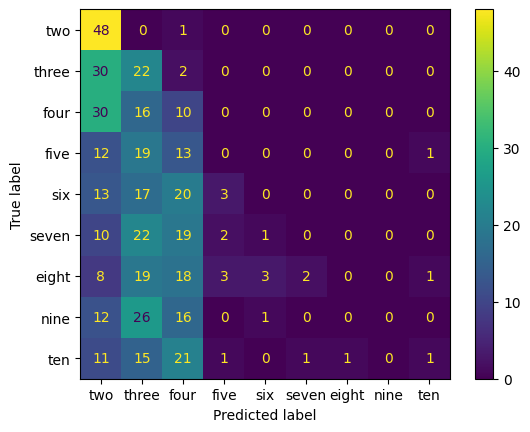

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print(y_pred_s)
print(y_s)

print(np.unique(y_pred))
print(np.unique(y))

# labels = ['two','three','four','five','six','seven','eight','nine','ten']
lbls = []
for i in range(len(np.unique(y))):
  lbls.append(num2word[np.unique(y)[i]])

# labels = np.unique(y)
labels = lbls

cf_matrix = confusion_matrix(y, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = labels)

cm_display.plot()
plt.savefig('count')
files.download("count.png")
plt.show()
